Davies-Bouldin Index: 0.9038676031209096


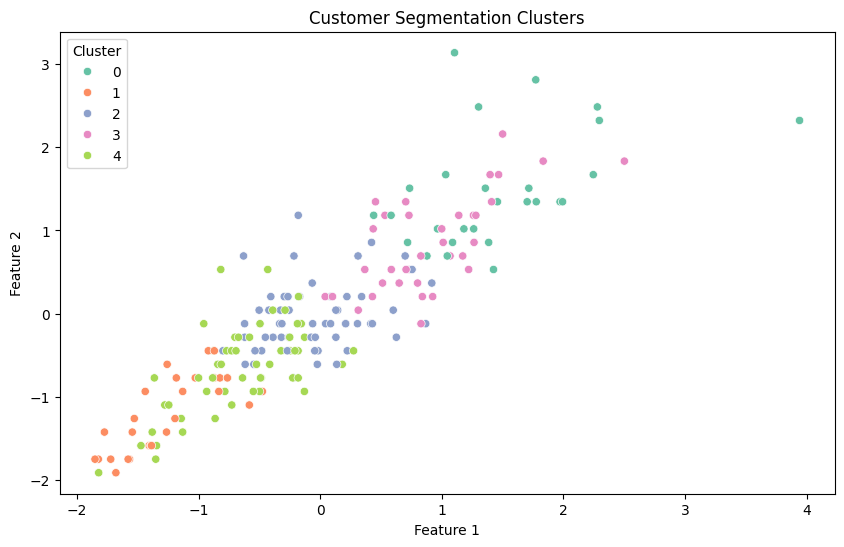

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
# Load the datasets
customer_data = pd.read_csv('Customers.csv')
product_data = pd.read_csv('Products.csv')
transaction_data = pd.read_csv('Transactions.csv')
# Merge the datasets to get a comprehensive dataset
data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')
# Task 3: Customer Segmentation (Clustering)
# Aggregate transaction data
clustering_data = data.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'Region': lambda x: label_encoder.transform([x.iloc[0]])[0]
}).reset_index()

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(clustering_data.iloc[:, 1:])

# Apply KMeans clustering
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clustering_data['Cluster'] = kmeans.fit_predict(scaled_features)

# Calculate Davies-Bouldin Index
def davies_bouldin_index(X, labels):
    from sklearn.metrics import pairwise_distances
    n_clusters = len(set(labels))
    clusters = [X[labels == i] for i in range(n_clusters)]
    centroids = [np.mean(cluster, axis=0) for cluster in clusters]
    s = [np.mean(pairwise_distances(cluster, [centroids[i]])) for i, cluster in enumerate(clusters)]
    db_index = np.mean([
        max((s[i] + s[j]) / np.linalg.norm(centroids[i] - centroids[j]) for j in range(n_clusters) if i != j)
        for i in range(n_clusters)
    ])
    return db_index

db_index_value = davies_bouldin_index(scaled_features, kmeans.labels_)
print("Davies-Bouldin Index:", db_index_value)

# Visualize Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=scaled_features[:, 0],
    y=scaled_features[:, 1],
    hue=clustering_data['Cluster'],
    palette='Set2'
)
plt.title('Customer Segmentation Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Cluster')
plt.show()

# Save clustering results
clustering_data.to_csv('Rasagna_Devi_Kavuluri_Clustering.csv', index=False)
